In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob

from mockFRBhosts import draw_galaxies, observed_bands

In [2]:
# Location to save figures.
fig_path = '../figures/'

if not os.path.isdir(fig_path):
    os.makedirs(fig_path)

sns.set_theme(style='whitegrid')

textwidth = 7.0282  # might also be from latex textwidth=17.85162cm columnwidth=8.5744cm
columnwidth = 3.37574803  #3.3

small_size = 8
medium_size = 10
bigger_size = 12

sns.set_theme(style="ticks", context="paper")

plt.rc('font', size=small_size)          # controls default text sizes
plt.rc('axes', titlesize=small_size)     # fontsize of the axes title
plt.rc('axes', labelsize=medium_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=small_size)    # legend fontsize
plt.rc('figure', titlesize=bigger_size)  # fontsize of the figure title


In [3]:
palette = sns.color_palette('Set2')  #sns.color_palette('Spectral', n_colors=5)[::2]  #
sns.set_palette(palette)
palette

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [4]:
# Load FRBs from the pickle files.
pickles = sorted(glob('../Simulated_FRBs/*.pickle'))

survey_models, z_models = [], []
for file in pickles:
    # Extract models from file names.
    params = os.path.basename(file)
    params = os.path.splitext(params)[0]
    params = params.split('_', 1)
    survey_models.append(params[0])
    z_models.append(params[1])

# Check files
pickles

['../Simulated_FRBs/askap-craco_sfr.pickle',
 '../Simulated_FRBs/askap-craco_smd.pickle',
 '../Simulated_FRBs/askap-craco_vol_co.pickle',
 '../Simulated_FRBs/askap-incoh_sfr.pickle',
 '../Simulated_FRBs/askap-incoh_smd.pickle',
 '../Simulated_FRBs/askap-incoh_vol_co.pickle',
 '../Simulated_FRBs/chime-frb_sfr.pickle',
 '../Simulated_FRBs/chime-frb_smd.pickle',
 '../Simulated_FRBs/chime-frb_vol_co.pickle',
 '../Simulated_FRBs/ska1-mid_sfr.pickle',
 '../Simulated_FRBs/ska1-mid_smd.pickle',
 '../Simulated_FRBs/ska1-mid_vol_co.pickle']

In [5]:
radio_survey_names = {"askap-craco" : "ASKAP/CRACO", "askap-incoh" : "ASKAP/ICS", "chime-frb" : "CHIME/FRB", "meerkat" : "MeerKAT", "ska1-mid" : "SKA1-Mid"}
cosm_pops = ["SFR", "SMD", r"$V_\mathrm{C}$"]

../Simulated_FRBs/askap-incoh_sfr.pickle
1195 FRBs in file, using only first 1000
../Simulated_FRBs/askap-incoh_smd.pickle
1031 FRBs in file, using only first 1000
../Simulated_FRBs/askap-incoh_vol_co.pickle
1009 FRBs in file, using only first 1000
ASKAP/ICS + SDSS:
Distance model: SFR, no host: 29.7%, all bands: 41.5%
Distance model: SMD, no host: 12.1%, all bands: 56.4%
Distance model: $V_\mathrm{C}$, no host: 14.6%, all bands: 50.7%
ASKAP/ICS + LSST:
Distance model: SFR, no host: 1.1%, all bands: 91.9%
Distance model: SMD, no host: 0.2%, all bands: 94.4%
Distance model: $V_\mathrm{C}$, no host: 0.4%, all bands: 92.7%
ASKAP/ICS + Euclid:
Distance model: SFR, no host: 1.8%, all bands: 93.2%
Distance model: SMD, no host: 0.6%, all bands: 97.6%
Distance model: $V_\mathrm{C}$, no host: 0.5%, all bands: 97.1%
ASKAP/ICS + DES:
Distance model: SFR, no host: 9.9%, all bands: 83.1%
Distance model: SMD, no host: 3.3%, all bands: 92.6%
Distance model: $V_\mathrm{C}$, no host: 4.2%, all bands: 9

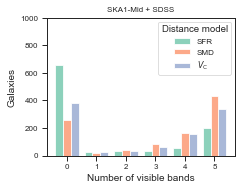

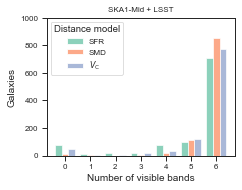

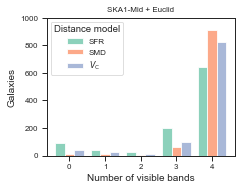

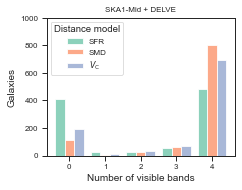

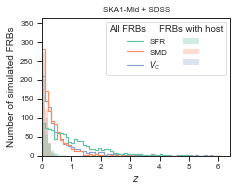

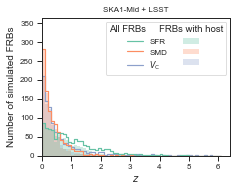

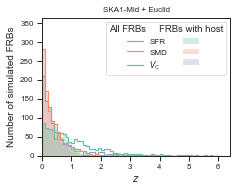

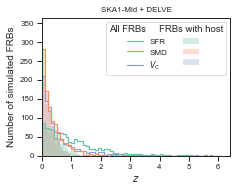

In [6]:
# Loop over FRB surveys and redshift distributions. Uncomment the next line if you don't want to loop.
#start_file = 6  # choose from 0, 3, 6, 9 for craco, incoh, chime, ska
n_frbs = 1000
n_files = 3
z_max = [2.5, 1.2, 3.5, 6.]

max_z_count = None
for start_file in [3, 0, 6, 9]:
    frb_pops = []
    if not (survey_models[start_file] == survey_models[start_file+1] == survey_models[start_file+2]):
        raise ValueError("You are trying to mix several telescopes into one plot. The naming does not allow this.")
    radio_survey = survey_models[start_file]
    radio_survey_name = radio_survey_names[radio_survey]

    for i_choose in range(start_file, start_file+n_files):
        chosen = pickles[i_choose]

        # Weight galaxy choice depending on file name
        if os.path.splitext(chosen)[0][-3:] == 'sfr':  # last thre letters before extension
            weights = 'mstardot'
        else:
            weights = 'mstars_total'
        print(chosen)

        frbs = np.load(chosen, allow_pickle=True)
        print(frbs.shape[0], "FRBs in file, using only first", n_frbs)
        frbs = frbs.iloc[:n_frbs].copy()

        galaxies, snapnum = draw_galaxies(frbs['z'], weights=weights, seed=42)

        # Order FRBs such that they correspond to galaxies at the same positions.
        frbs.loc[:, 'snapnum'] = snapnum
        frbs.sort_values('snapnum', ascending=True, inplace=True)

        n_bands_obs_SDSS, n_bands_obs_LSST, n_bands_obs_Euclid, n_bands_obs_DES = observed_bands(frbs, galaxies)

        frbs['n_bands_SDSS'] = n_bands_obs_SDSS.to_numpy()
        frbs['n_bands_LSST'] = n_bands_obs_LSST.to_numpy()
        frbs['n_bands_Euclid'] = n_bands_obs_Euclid.to_numpy()
        frbs['n_bands_DES'] = n_bands_obs_DES.to_numpy()

        # Save to a list to plot several surveys at once.
        frb_pops.append(frbs)

    for i, frbs in enumerate(frb_pops):
        frbs['Distance model'] = cosm_pops[i]
    frb_pops = pd.concat(frb_pops,)

    frb_pops.index = range(frb_pops.shape[0])

    plt.close('all')

    # Make histograms of the visible number of bands
    for survey in ['SDSS', 'LSST', 'Euclid', 'DES']:
        fig, ax = plt.subplots(figsize=(columnwidth, columnwidth/6.4*4.8))

        band_column = 'n_bands_' + survey
        n_bands = frb_pops[band_column].max()
        bins = np.linspace(-.5, n_bands+.5, n_bands+2)
        sns.histplot(data=frb_pops, x=band_column, hue='Distance model', 
                     bins=bins, multiple='dodge', 
                     fill=True, shrink=.8, )

        # Name axes etc.
        ax.set_xlabel('Number of visible bands')
        ax.set_ylabel('Galaxies')
        ax.set_xticks(range(0, n_bands+1))
        ax.set_ylim(0, n_frbs)
        #ax.legend()
        ax.set_title(radio_survey_name + " + " + survey)
        if survey == 'DES':
            ax.set_title(radio_survey_name + " + DELVE")
        fig.savefig(fig_path + f"n_bands_{radio_survey}_{survey}.png", dpi=300, bbox_inches='tight')

        # Print the basic stats
        print(radio_survey_name + " + " + survey + ":")
        for model in cosm_pops:
            frbs = frb_pops[frb_pops['Distance model'] == model]
            n_band_hist = np.histogram(frbs[band_column], bins)[0]
            print(f"Distance model: {model}, no host: {n_band_hist[0]/n_frbs:.1%}, all bands: {n_band_hist[-1]/n_frbs:.1%}")

    # Make histograms of FRBs in redshift.
    for survey in ['SDSS', 'LSST', 'Euclid', 'DES']:
        # Get the band numbers out of the data frame
        band_column = 'n_bands_' + survey
        n_bands_obs = frb_pops[band_column]
        n_bands = n_bands_obs.max()

        fig, ax = plt.subplots(figsize=(columnwidth, columnwidth/6.4*4.8))

        # Fix bin width. Put one extra bin on each side to draw the line back to the bottom.
        binwidth = 0.1
        bins = np.arange(0-binwidth, z_max[i_choose//3]+2*binwidth, binwidth)

        sns.histplot(data=frb_pops.iloc[::-1], x='z', hue='Distance model', hue_order=cosm_pops[:n_files],
                     bins=bins, element='step', fill=False, legend=True, ax=ax)  # label="FRBs" palette=palette[:n_files], 
        handles_hist1 = ax.legend_.legendHandles  # save for later

        sns.histplot(data=frb_pops.loc[n_bands_obs.to_numpy() == n_bands].iloc[::-1].reindex(), 
                     x='z', hue='Distance model', hue_order=cosm_pops[:n_files],
                     bins=bins, element='step', alpha=.3,
                     linewidth=0, legend=True, ax=ax) #palette=palette[:n_files],  # label="Host visible"

        ax.set_xlabel('$z$')
        ax.set_ylabel('Number of simulated FRBs')
        ax.set_title(radio_survey_name + " + " + survey)  #, y=.9
        if survey == 'DES':
            ax.set_title(radio_survey_name + " + DELVE")

        # Set same redshift range except for SKA
        if radio_survey == 'ska1-mid':
            ax.set_xlim(0, None)
        else:
            ax.set_xlim(0, 3.5)
            ax.set_xticks([0,1,2,3])

        # Set fixed y-limits from the first bin in ASKAP/ICS with SMD
        if (radio_survey == 'askap-incoh') and not max_z_count:
            max_z_count = np.count_nonzero(frb_pops.loc[frb_pops['Distance model'] == 'SMD', 'z'] < binwidth) * 26/25  # add 4%
        ax.set_ylim(0, max_z_count)

        # For someweird reason calling ax.legend displays the handles in reverse order, the following puts them in right order
        # inspired by https://github.com/mwaskom/seaborn/issues/2280
        old_legend = ax.legend_
        handles_hist2 = old_legend.legendHandles
        handles = handles_hist1 + handles_hist2
        labels = [t.get_text() for t in old_legend.get_texts()]

        # Finally make the new legend.
        l = ax.legend(title="All FRBs     FRBs with host",
                  handles=handles,
                  labels=labels + len(labels)*["",],  #cosm_pops[:n_files],  loc=(.34, .5),
                  ncol=2,)

        fig.savefig(fig_path + f"visible_galaxies_{radio_survey}_{survey}.png", dpi=300, bbox_inches='tight')
